In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pyformulas as pf
import time
import seaborn as sns

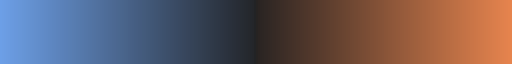

In [63]:
dim = 2
N = 50
M = int(0.58 * N ** (1/2))
stripes = np.linspace(0,1, M+1)
L = 1
interval = (0,L)
s = np.random.default_rng().uniform(*interval,dim*N).reshape(N, dim)
colors = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
colors

In [64]:
def separatePoints(sample, stripes, M):
    points = {i:[] for i in range(M)}
    n = len(sample)
    for j in range(n):
        stripe = np.argmin(sample[j,0] > stripes)-1
        points[stripe].append(sample[j])
    for i in range(M):
        points[i].sort(key=lambda x: (-1)**i * x[1])  
    return points

def TPSApproximated(sample, stripes, M, L):
    points = separatePoints(sample, stripes, M)
    lines = []
    num_points = [len(points[i]) for i in range(M)]
    for i in range(M):
        if i < M and num_points[i] > 0:
            if i > 0 and num_points[i-1] > 0:
                x0,y0 = points[i-1][-1]
                x2,y2 = points[i][0]
                lines.append([(x0,x2),(y0,y2)])
            elif i > 0 and num_points[i-1] == 0:
                x0,y0 = (stripes[i-1], L/2 - (-1)**(i-1) * L/2)
                x1,y1 = (stripes[i], L/2 - (-1)**(i) * L/2)
                x2,y2 = points[i][0]
                lines.append([(x0,x1),(y0,y1)])
                lines.append([(x1,x2),(y1,y2)])
            for j in range(1,num_points[i]):
                x1,y1 = points[i][j-1]
                x2,y2 = points[i][j]
                lines.append([(x1,x2),(y1,y2)])
        else:
            if i > 0:
                x1,y1 = points[i-1][-1] if num_points[i-1] > 0 else (stripes[i-1], L/2 - (-1)**(i-1) * L/2)
                x2,y2 = (stripes[i], L/2 - (-1)**(i) * L/2)
                lines.append([(x1,x2),(y1,y2)])
    if num_points[-1] == 0:
        x1,y1 = (stripes[M-1], L/2 - (-1)**(M-1) * L/2)
        x2,y2 = (stripes[M], L/2 - (-1)**(M) * L/2)
        lines.append([(x1,x2),(y1,y2)])
    return lines

/tmp/ipykernel_15542/3153599112.py:25: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
/tmp/ipykernel_15542/3153599112.py:25: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
/tmp/ipykernel_15542/3153599112.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(*point, c= colors(i/M))


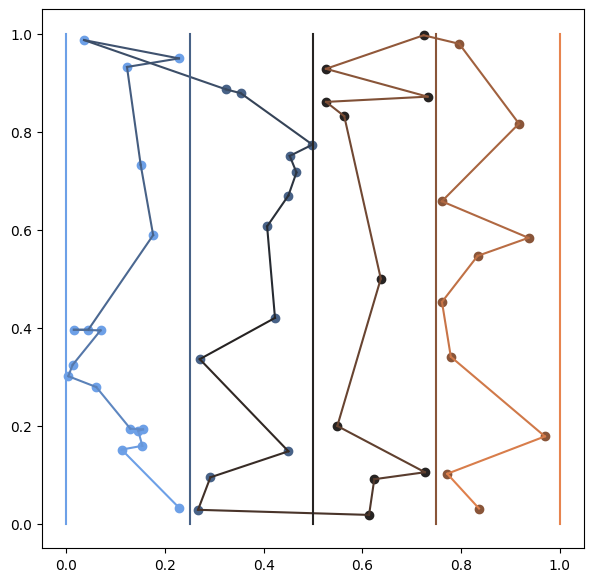

In [65]:

fig = plt.figure()
screen = pf.screen(title='Plot')
start = time.time()
time.sleep(3)
for k in range(0,9):
    n = int(1.63**k) if k > 0 else 0
    fig.clear()
    revealed = s[:n]
    points = separatePoints(revealed, stripes, M)
    lines = TPSApproximated(revealed, stripes, M, L)
    for i in range(M):
        for point in points[i]:
            plt.scatter(*point, c= colors(i/M))

    num_lines = len(lines)
    for i in range(num_lines):
        plt.plot(*lines[i], c=colors(i/num_lines))

    for i in range(M+1):
        x = stripes[i]
        plt.plot([x,x], [0,L], c=colors(i/M) )
    fig.set_size_inches(7, 7)
    fig.canvas.draw()
    fig.savefig('TSPPictures/pic%s.png' % k, dpi=100)
    image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    screen.update(image)


screen.close()

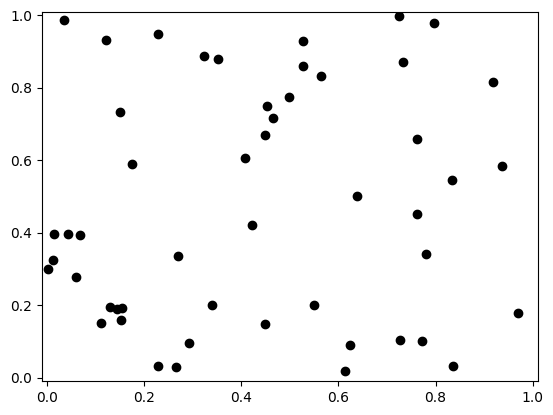

In [66]:
n = 50
fig, ax = plt.subplots()
revealed = s[:n]
points = separatePoints(revealed, stripes, M)
lines = TPSApproximated(revealed, stripes, M, L)

for i in range(M):
    for point in points[i]:
        plt.scatter(*point, c= 'black')#colors((i+1)/M))

# for i in range(M+1):
#     x = stripes[i]
#     plt.plot([x,x], [0,L], c=colors(i/M) )

# num_lines = len(lines)
# for i in range(num_lines):
#     plt.plot(*lines[i], c=colors(i/num_lines))
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-0.01,1.01)
for i in stripes:
    plt.axhline(i, color='gray', linestyle='--')
    plt.axvline(i, color='gray', linestyle='--')
fig.set_size_inches(7, 7)
fig.savefig('TSPPictures/grid.png', dpi=100)

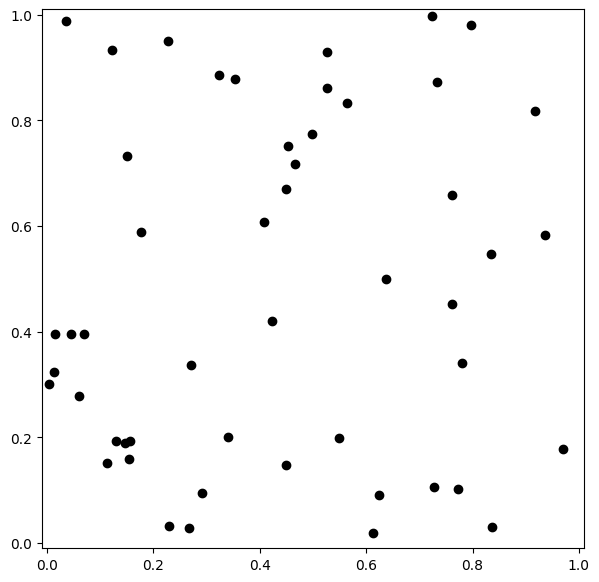

In [74]:
n = 50
fig, ax = plt.subplots()
revealed = s[:n]
points = separatePoints(revealed, stripes, M)
lines = TPSApproximated(revealed, stripes, M, L)

for i in range(M):
    for point in points[i]:
        plt.scatter(*point, c ='black')

# for i in range(M+1):
#     x = stripes[i]
#     plt.plot([x,x], [0,L], c=colors(i/M) )

# num_lines = len(lines)
# for i in range(num_lines):
#     plt.plot(*lines[i], c=colors(i/num_lines))
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-0.01,1.01)
fig.set_size_inches(7, 7)
fig.savefig('TSPPictures/ex0.png', dpi=100)

/tmp/ipykernel_15542/2514385156.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(*point, c= colors((i+1)/M))


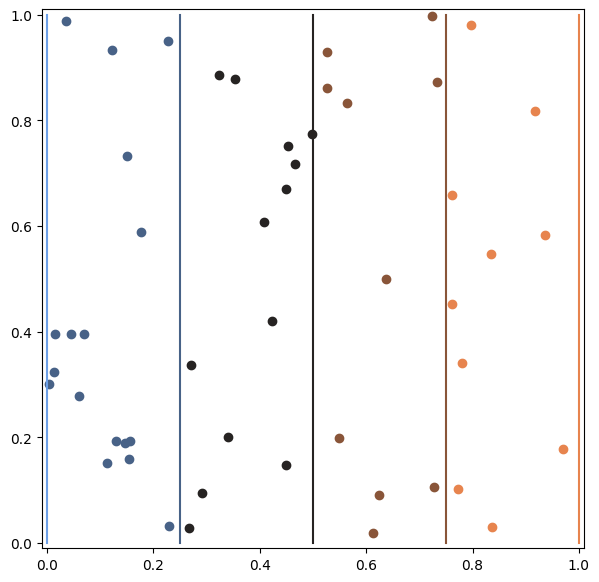

In [72]:
n = 50
fig, ax = plt.subplots()
revealed = s[:n]
points = separatePoints(revealed, stripes, M)
lines = TPSApproximated(revealed, stripes, M, L)

for i in range(M):
    for point in points[i]:
        plt.scatter(*point, c= colors((i+1)/M))

for i in range(M+1):
    x = stripes[i]
    plt.plot([x,x], [0,L], c=colors(i/M) )

# num_lines = len(lines)
# for i in range(num_lines):
#     plt.plot(*lines[i], c=colors(i/num_lines))
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-0.01,1.01)
fig.set_size_inches(7, 7)
fig.savefig('TSPPictures/ex1.png', dpi=100)

/tmp/ipykernel_15542/3344726964.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(*point, c= colors((i+1)/M))


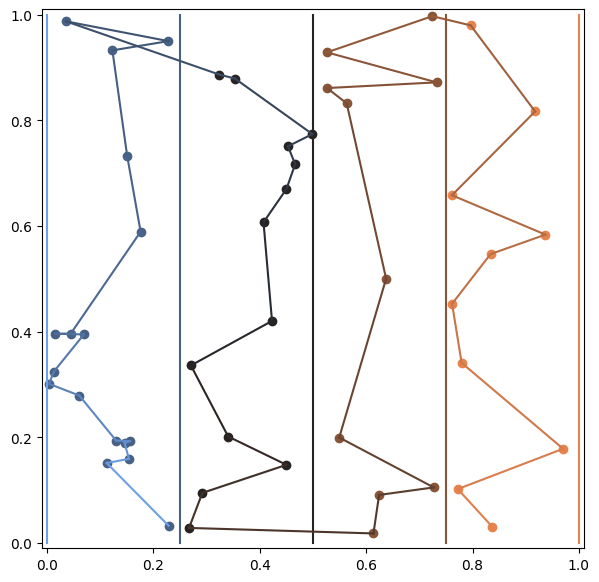

In [68]:
n = 50
fig, ax = plt.subplots()
revealed = s[:n]
points = separatePoints(revealed, stripes, M)
lines = TPSApproximated(revealed, stripes, M, L)

for i in range(M):
    for point in points[i]:
        plt.scatter(*point, c= colors((i+1)/M))

for i in range(M+1):
    x = stripes[i]
    plt.plot([x,x], [0,L], c=colors(i/M) )

num_lines = len(lines)
for i in range(num_lines):
    plt.plot(*lines[i], c=colors(i/num_lines))
ax.set_xlim(-0.01,1.01)
ax.set_ylim(-0.01,1.01)
fig.set_size_inches(7, 7)
fig.savefig('TSPPictures/ex2.png', dpi=100)